In [20]:
import sys
sys.path.append('/Users/sdbykov/work/self-supervised-halos/')

In [21]:
import requests
import numpy as np
import h5py
from tqdm import tqdm
import os
from glob import glob

%matplotlib inline

from utils.data.tng_query import get, HaloInfo
from utils.utils import data_path
data_path = data_path+'tng/'

In [22]:
#downloaded_halos = os.listdir(data_path+'/')
downloaded_halos = glob(data_path+'/*_cutout.hdf5')
downloaded_halos = [halo.split('_')[1] for halo in downloaded_halos]
downloaded_halos = list([int(i) for i in downloaded_halos])
downloaded_halos.sort()

In [23]:
downloaded_halos[0:5]

[0, 24681, 44062, 59551, 74363]

In [24]:
import illustris_python as il

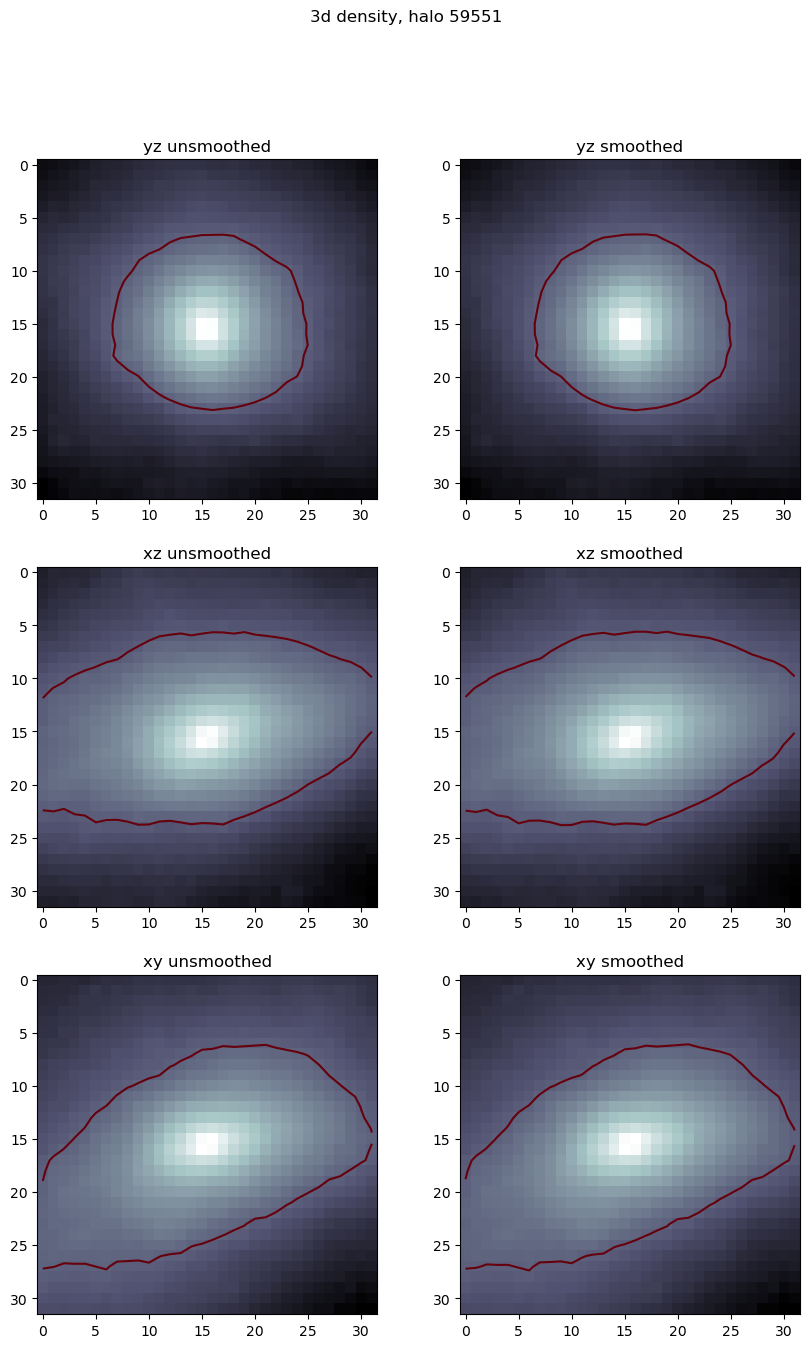

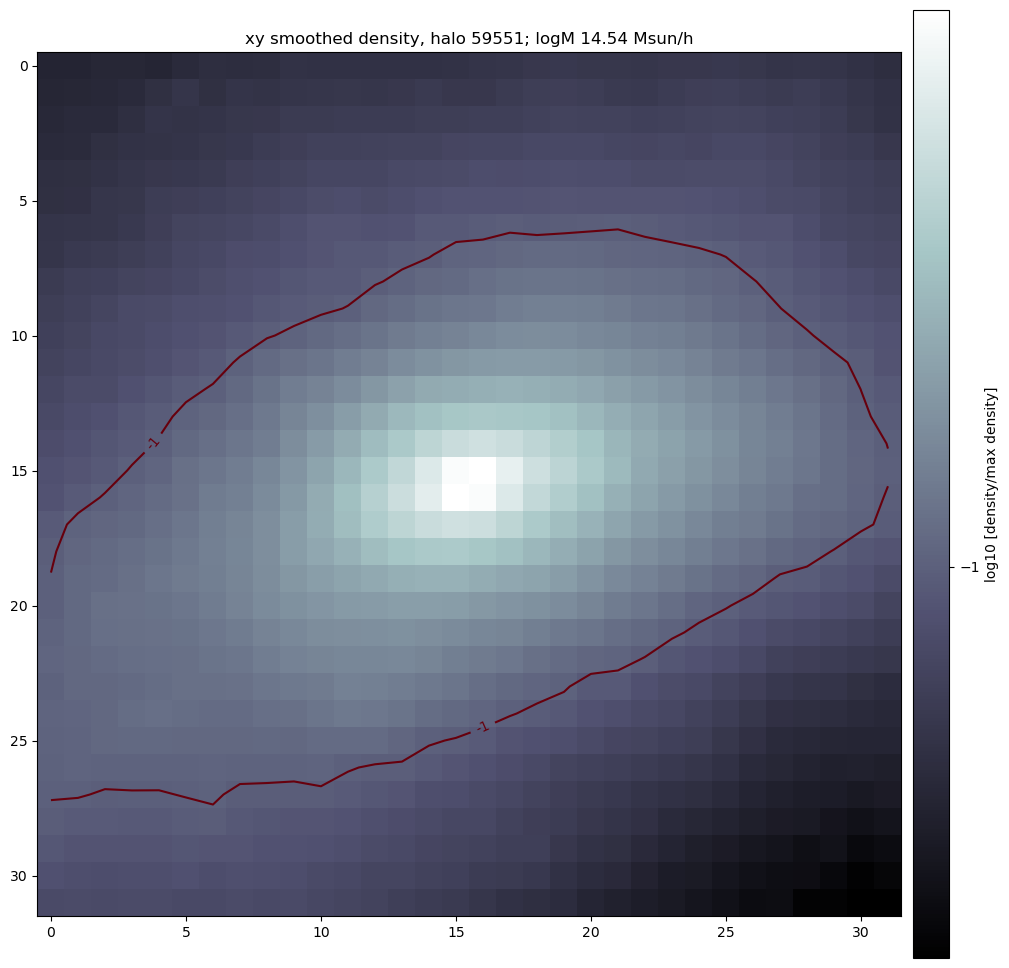

In [42]:
from utils.data.tng_query import HaloInfo

#halo = HaloInfo(downloaded_halos[-3])
halo = HaloInfo(downloaded_halos[3])


dens = halo.make_3d_density(grid_bins=32)
halo._plot_3d_density(dens)


/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_68716/3858171999.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.sum(hist, axis = 2)).T)


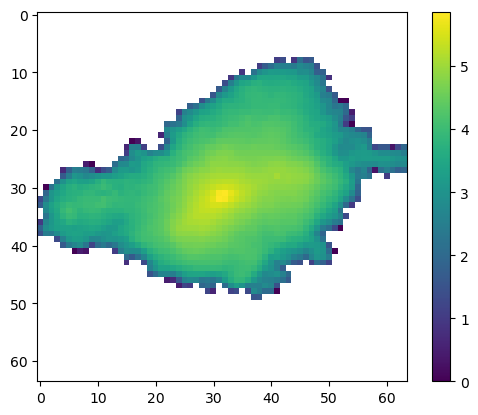

In [46]:
halfmass_radius = halo.meta['SubhaloHalfmassRad']
box_size = 8*halfmass_radius
bins = 64
pos = dens['pos']

phys_size_of_bin = box_size/bins

hist, edges = np.histogramdd(pos, bins=bins, range=[[-box_size/2, box_size/2], [-box_size/2, box_size/2], [-box_size/2, box_size/2]])

plt.imshow(np.log10(np.sum(hist, axis = 2)).T)
plt.colorbar()

In [44]:
phys_size_of_bin

67.70654296875

In [27]:
dens['edges']

[array([-250.   , -234.375, -218.75 , -203.125, -187.5  , -171.875,
        -156.25 , -140.625, -125.   , -109.375,  -93.75 ,  -78.125,
         -62.5  ,  -46.875,  -31.25 ,  -15.625,    0.   ,   15.625,
          31.25 ,   46.875,   62.5  ,   78.125,   93.75 ,  109.375,
         125.   ,  140.625,  156.25 ,  171.875,  187.5  ,  203.125,
         218.75 ,  234.375,  250.   ]),
 array([-250.   , -234.375, -218.75 , -203.125, -187.5  , -171.875,
        -156.25 , -140.625, -125.   , -109.375,  -93.75 ,  -78.125,
         -62.5  ,  -46.875,  -31.25 ,  -15.625,    0.   ,   15.625,
          31.25 ,   46.875,   62.5  ,   78.125,   93.75 ,  109.375,
         125.   ,  140.625,  156.25 ,  171.875,  187.5  ,  203.125,
         218.75 ,  234.375,  250.   ]),
 array([-250.   , -234.375, -218.75 , -203.125, -187.5  , -171.875,
        -156.25 , -140.625, -125.   , -109.375,  -93.75 ,  -78.125,
         -62.5  ,  -46.875,  -31.25 ,  -15.625,    0.   ,   15.625,
          31.25 ,   46.875,   62.5  

In [30]:
halo.meta['SubhaloHalfmassRad']

20.256175994873047

In [19]:
halo.meta

{'SubhaloCM': array([23199.18 , 12566.774, 15933.126], dtype=float32),
 'SubhaloGrNr': 18291,
 'SubhaloHalfmassRad': 20.256175994873047,
 'SubhaloHalfmassRadType': array([ 0.      , 20.256176,  0.      ,  0.      ,  0.      ,  0.      ],
       dtype=float32),
 'SubhaloIDMostbound': 2504767413,
 'SubhaloLen': 11768,
 'SubhaloLenType': array([    0, 11768,     0,     0,     0,     0], dtype=int32),
 'SubhaloMass': 7.060433864593506,
 'SubhaloMassInHalfRad': 0.0,
 'SubhaloMassInHalfRadType': array([0., 0., 0., 0., 0., 0.], dtype=float32),
 'SubhaloMassInMaxRad': 1.636715054512024,
 'SubhaloMassInMaxRadType': array([0.      , 1.636715, 0.      , 0.      , 0.      , 0.      ],
       dtype=float32),
 'SubhaloMassInRad': 0.0,
 'SubhaloMassInRadType': array([0., 0., 0., 0., 0., 0.], dtype=float32),
 'SubhaloMassType': array([0.      , 7.060434, 0.      , 0.      , 0.      , 0.      ],
       dtype=float32),
 'SubhaloParent': 0,
 'SubhaloPos': array([23198.848, 12567.037, 15933.625], dtype=fl

In [10]:
dens['pos'].shape

(38959666, 3)

In [8]:
dens['mass_log_msun']

14.537898759074809

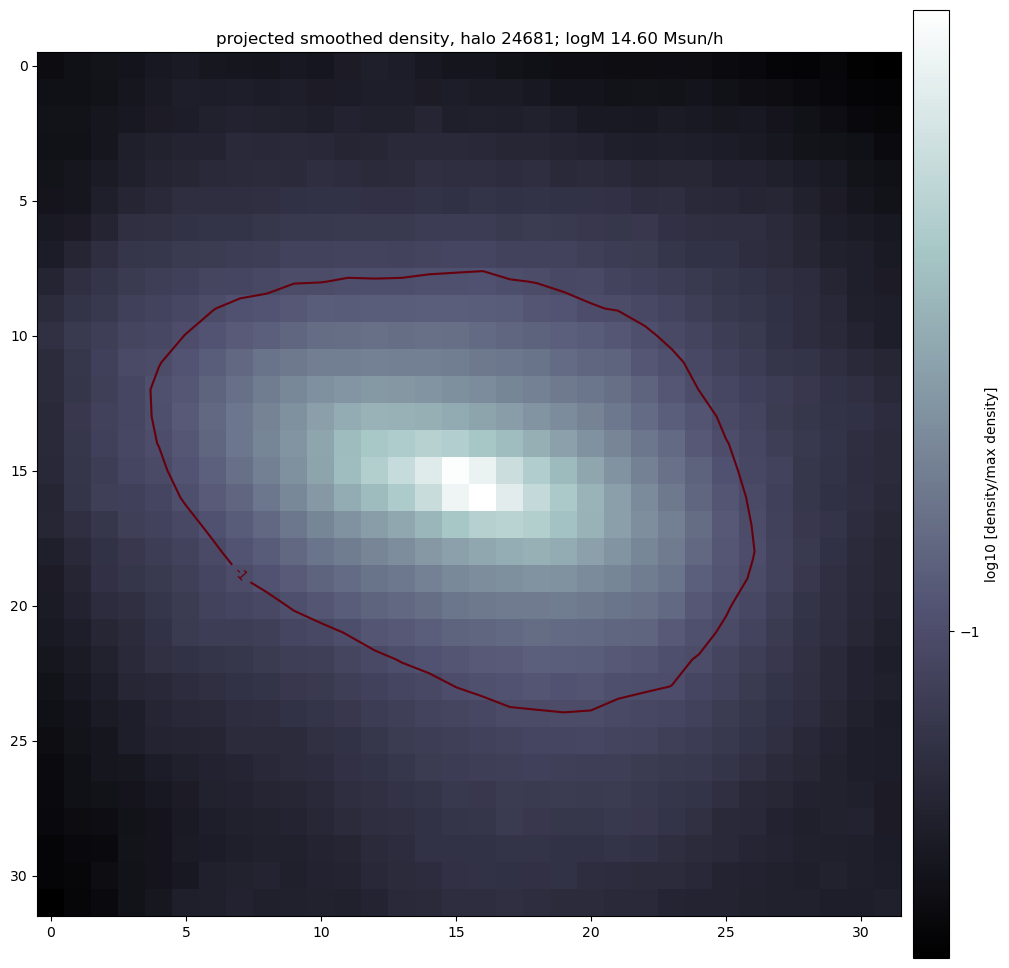

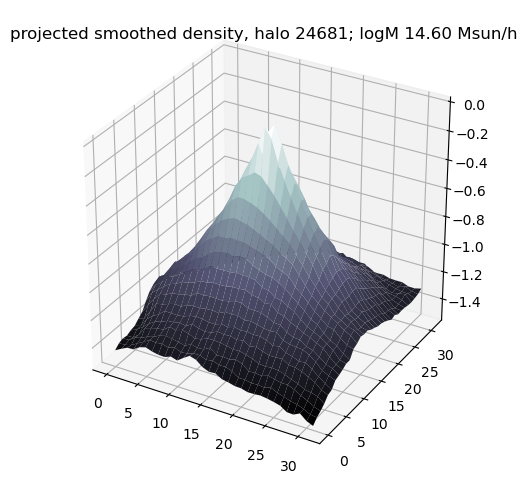

In [68]:

dens_2d = halo.make_2d_density(grid_bins=32)
halo._plot_2d_density(dens_2d)

halo._plot_2d_density_surface(dens_2d)


In [74]:
dens_new = dens['hist_smoothed'].astype(np.float16)

np.save(data_path[:-4]+'/tng_postprocess/dens_new.npy', dens_new)
np.save(data_path[:-4]+'/tng_postprocess/dens.npy', dens['hist_smoothed'])
#np.save(data_path[:-4]+'/tng_postprocess/dens.npy', dens['hist'])

In [75]:
16000*0.1

1600.0

In [72]:
dens['hist_smoothed'].shape

(64, 64, 64)